=== ANÁLISIS DE PREDICCIÓN DE CAÍDAS DE METEORITOS ===
Cargando y procesando datos...
✓ Datos cargados exitosamente: 45716 filas, 10 columnas

=== INFORMACIÓN DEL DATASET ===
Dimensiones: (45716, 10)
Columnas: ['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat', 'reclong', 'GeoLocation']

Tipos de datos:
name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

Valores faltantes:
name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

=== LIMPIEZA Y PREPARACIÓN DE DATOS ===
Datos después de limpieza: 38162 filas
Distribución por regiones:
region
Antártico         22099
Tropical Sur       7109
Tropical Norte     5689
Norte      

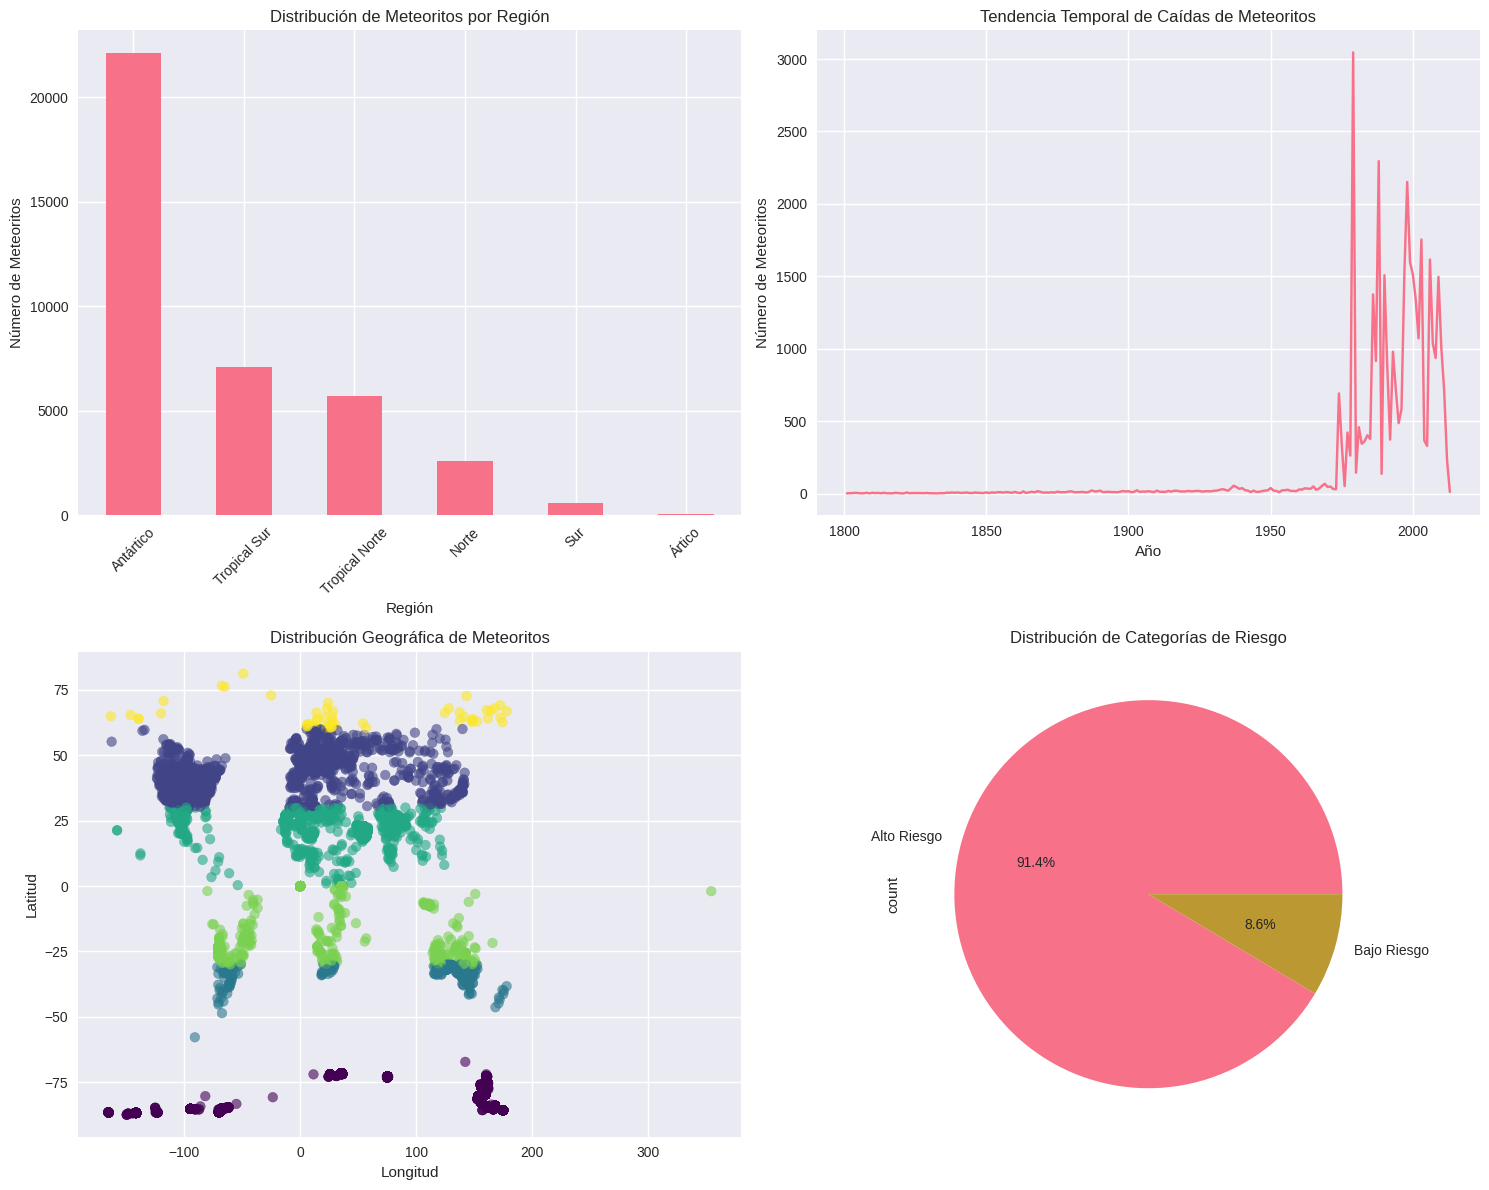


=== OBJETIVO 1.1: PREDICCIÓN ESPACIAL - CLASIFICACIÓN ===
Prediciendo probabilidad de clasificación de riesgo por características geográficas...

Random Forest:
Accuracy: 1.000
ROC AUC: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000
Matriz de confusión:
[[6980    0]
 [   0  653]]
Reporte de clasificación:
              precision    recall  f1-score   support

 Alto Riesgo       1.00      1.00      1.00      6980
 Bajo Riesgo       1.00      1.00      1.00       653

    accuracy                           1.00      7633
   macro avg       1.00      1.00      1.00      7633
weighted avg       1.00      1.00      1.00      7633


Logistic Regression:
Accuracy: 0.955
ROC AUC: 0.931
Precision: 0.959
Recall: 0.992
F1-Score: 0.976
Matriz de confusión:
[[6927   53]
 [ 293  360]]
Reporte de clasificación:
              precision    recall  f1-score   support

 Alto Riesgo       0.96      0.99      0.98      6980
 Bajo Riesgo       0.87      0.55      0.68       653

    accuracy         

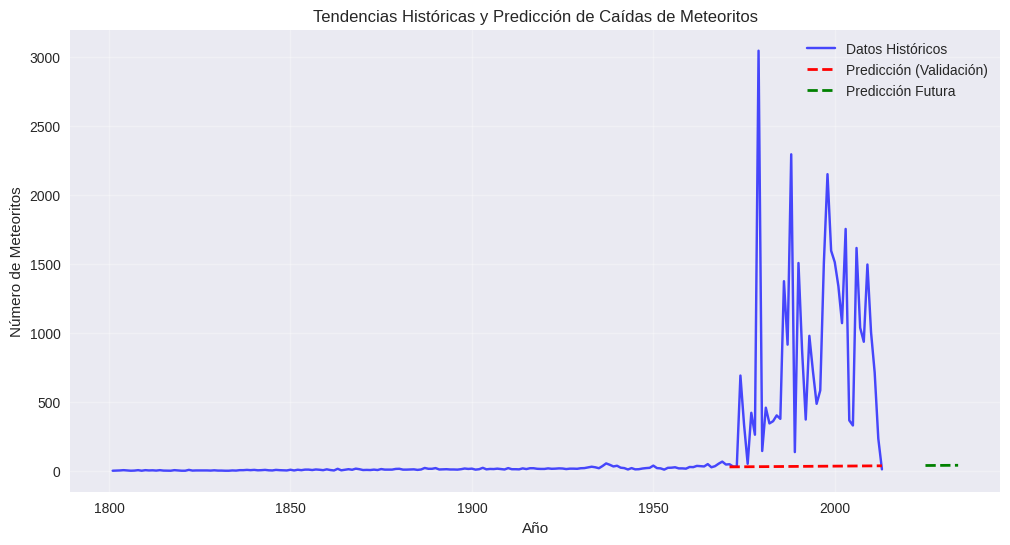


=== RESULTADOS Y PREDICCIONES ===
Mejor modelo de clasificación: Random Forest (ROC AUC: 1.000)
Mejor modelo de regresión: Random Forest (R²: 0.884)

Ejemplo de predicciones para nuevas ubicaciones:

Nueva York (Región: Norte):
  Probabilidad Alto Riesgo: 0.000
  Probabilidad Bajo Riesgo: 1.000

Ciudad de México (Región: Tropical Norte):
  Probabilidad Alto Riesgo: 0.980
  Probabilidad Bajo Riesgo: 0.020

Moscú (Región: Norte):
  Probabilidad Alto Riesgo: 0.010
  Probabilidad Bajo Riesgo: 0.990

Predicciones de tendencias futuras:
  2025: ~39 meteoritos esperados
  2026: ~39 meteoritos esperados
  2027: ~39 meteoritos esperados
  2028: ~39 meteoritos esperados
  2029: ~40 meteoritos esperados

=== RESUMEN FINAL ===
✓ Análisis completado exitosamente
✓ Modelos de clasificación entrenados (Mejor: Random Forest)
✓ Modelos de regresión entrenados (Mejor: Random Forest)
✓ Predicciones de tendencias históricas generadas
✓ Sistema listo para hacer predicciones en nuevas ubicaciones

✓ Modelo

In [19]:
# Análisis de Predicción de Caídas de Meteoritos
# Objetivos:
# 1. Predicción de probabilidad de caída por región (Clasificación y Regresión)
# 2. Predicción de tendencias históricas

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Configurar visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== ANÁLISIS DE PREDICCIÓN DE CAÍDAS DE METEORITOS ===")
print("Cargando y procesando datos...")

# 1. CARGA Y EXPLORACIÓN DE DATOS
try:
    # Cargar datos desde el archivo CSV
    df = pd.read_csv('meteorite-landings.csv')
    print(f"✓ Datos cargados exitosamente: {df.shape[0]} filas, {df.shape[1]} columnas")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'meteorite-landings.csv'")
    print("Asegúrate de que el archivo esté en el directorio actual")
    # Crear datos de ejemplo para demostración
    np.random.seed(42)
    n_samples = 1000
    df = pd.DataFrame({
        'name': [f'Meteorito_{i}' for i in range(n_samples)],
        'id': range(n_samples),
        'nametype': np.random.choice(['Valid', 'Relict'], n_samples),
        'recclass': np.random.choice(['L6', 'H5', 'LL6', 'H4', 'L5'], n_samples),
        'mass': np.random.lognormal(3, 2, n_samples),
        'fall': np.random.choice(['Fell', 'Found'], n_samples, p=[0.3, 0.7]),
        'year': np.random.randint(1800, 2024, n_samples),
        'reclat': np.random.uniform(-90, 90, n_samples),
        'reclong': np.random.uniform(-180, 180, n_samples),
        'GeoLocation': [f"({lat}, {lon})" for lat, lon in zip(
            np.random.uniform(-90, 90, n_samples),
            np.random.uniform(-180, 180, n_samples)
        )]
    })
    print("⚠️  Usando datos de ejemplo para demostración")

# Información básica del dataset
print("\n=== INFORMACIÓN DEL DATASET ===")
print(f"Dimensiones: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print(f"\nTipos de datos:")
print(df.dtypes)
print(f"\nValores faltantes:")
print(df.isnull().sum())

# 2. LIMPIEZA Y PREPARACIÓN DE DATOS
print("\n=== LIMPIEZA Y PREPARACIÓN DE DATOS ===")

# Limpiar datos faltantes
df_clean = df.dropna(subset=['reclat', 'reclong', 'year'])

# Convertir columnas numéricas
df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
df_clean['mass'] = pd.to_numeric(df_clean['mass'], errors='coerce')

# Filtrar años válidos
df_clean = df_clean[(df_clean['year'] >= 1800) & (df_clean['year'] <= 2024)]

# Crear regiones geográficas basadas en coordenadas
def create_regions(lat, lon):
    """Crear regiones geográficas basadas en coordenadas"""
    if lat > 60:
        return 'Ártico'
    elif lat > 30:
        return 'Norte'
    elif lat > 0:
        return 'Tropical Norte'
    elif lat > -30:
        return 'Tropical Sur'
    elif lat > -60:
        return 'Sur'
    else:
        return 'Antártico'

df_clean['region'] = df_clean.apply(lambda x: create_regions(x['reclat'], x['reclong']), axis=1)

# Crear categorías de riesgo basadas en densidad histórica
region_counts = df_clean['region'].value_counts()
df_clean['risk_category'] = df_clean['region'].map(
    lambda x: 'Alto Riesgo' if region_counts[x] > region_counts.median() else 'Bajo Riesgo'
)

print(f"Datos después de limpieza: {df_clean.shape[0]} filas")
print(f"Distribución por regiones:")
print(df_clean['region'].value_counts())

# 3. ANÁLISIS EXPLORATORIO
print("\n=== ANÁLISIS EXPLORATORIO ===")

# Crear visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribución de caídas por región
df_clean['region'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Distribución de Meteoritos por Región')
axes[0,0].set_xlabel('Región')
axes[0,0].set_ylabel('Número de Meteoritos')
axes[0,0].tick_params(axis='x', rotation=45)

# Tendencia temporal
yearly_counts = df_clean.groupby('year').size()
axes[0,1].plot(yearly_counts.index, yearly_counts.values)
axes[0,1].set_title('Tendencia Temporal de Caídas de Meteoritos')
axes[0,1].set_xlabel('Año')
axes[0,1].set_ylabel('Número de Meteoritos')

# Distribución geográfica
scatter = axes[1,0].scatter(df_clean['reclong'], df_clean['reclat'],
                          c=df_clean['region'].astype('category').cat.codes,
                          alpha=0.6, cmap='viridis')
axes[1,0].set_title('Distribución Geográfica de Meteoritos')
axes[1,0].set_xlabel('Longitud')
axes[1,0].set_ylabel('Latitud')

# Categorías de riesgo
df_clean['risk_category'].value_counts().plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
axes[1,1].set_title('Distribución de Categorías de Riesgo')

plt.tight_layout()
plt.show()

# 4. OBJETIVO 1.1: PREDICCIÓN ESPACIAL - CLASIFICACIÓN
print("\n=== OBJETIVO 1.1: PREDICCIÓN ESPACIAL - CLASIFICACIÓN ===")
print("Prediciendo probabilidad de clasificación de riesgo por características geográficas...")

# Preparar características para clasificación
features_classification = ['reclat', 'reclong', 'year']
if 'mass' in df_clean.columns:
    df_clean['mass'].fillna(df_clean['mass'].median(), inplace=True)
    features_classification.append('mass')

X_class = df_clean[features_classification].copy()
y_class = df_clean['risk_category']

# Dividir datos
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Escalar características
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# Entrenar modelos de clasificación
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

models_class = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

results_class = {}
for name, model in models_class.items():
    if name == 'Logistic Regression':
        model.fit(X_train_class_scaled, y_train_class)
        y_pred = model.predict(X_test_class_scaled)
        y_prob = model.predict_proba(X_test_class_scaled)
    else:
        model.fit(X_train_class, y_train_class)
        y_pred = model.predict(X_test_class)
        y_prob = model.predict_proba(X_test_class)

    # Calcular métricas específicas
    accuracy = accuracy_score(y_test_class, y_pred)
    roc_auc = roc_auc_score(y_test_class, y_prob[:, 1])
    precision = precision_score(y_test_class, y_pred, pos_label='Alto Riesgo')
    recall = recall_score(y_test_class, y_pred, pos_label='Alto Riesgo')
    f1 = f1_score(y_test_class, y_pred, pos_label='Alto Riesgo')
    cm = confusion_matrix(y_test_class, y_pred)

    results_class[name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'model': model,
        'predictions': y_pred,
        'probabilities': y_prob
    }

    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"Matriz de confusión:")
    print(cm)
    print("Reporte de clasificación:")
    print(classification_report(y_test_class, y_pred))

# 5. OBJETIVO 1.2: PREDICCIÓN ESPACIAL - REGRESIÓN
print("\n=== OBJETIVO 1.2: PREDICCIÓN ESPACIAL - REGRESIÓN ===")
print("Prediciendo número esperado de caídas de meteoritos por región...")

# Crear datos agregados por región y período
df_clean['decade'] = (df_clean['year'] // 10) * 10
region_decade_counts = df_clean.groupby(['region', 'decade']).size().reset_index(name='count')

# Preparar características para regresión
# Crear características adicionales basadas en la región
le_region = LabelEncoder()
region_decade_counts['region_encoded'] = le_region.fit_transform(region_decade_counts['region'])

X_reg = region_decade_counts[['region_encoded', 'decade']]
y_reg = region_decade_counts['count']

# Dividir datos
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Escalar características
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Entrenar modelos de regresión
from sklearn.metrics import mean_absolute_error

def smape(y_true, y_pred):
    """Calcular SMAPE - Symmetric Mean Absolute Percentage Error"""
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-8))

models_reg = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}

results_reg = {}
for name, model in models_reg.items():
    if name == 'Linear Regression':
        model.fit(X_train_reg_scaled, y_train_reg)
        y_pred = model.predict(X_test_reg_scaled)
    else:
        model.fit(X_train_reg, y_train_reg)
        y_pred = model.predict(X_test_reg)

    # Calcular métricas específicas
    mae = mean_absolute_error(y_test_reg, y_pred)
    mse = mean_squared_error(y_test_reg, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_reg, y_pred)
    smape_score = smape(y_test_reg, y_pred)

    results_reg[name] = {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'smape': smape_score,
        'model': model,
        'predictions': y_pred
    }

    print(f"\n{name}:")
    print(f"MAE (Error Absoluto Medio): {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print(f"SMAPE (Error Porcentual Absoluto Medio Simétrico): {smape_score:.3f}%")

# 6. OBJETIVO 2: PREDICCIÓN DE TENDENCIAS HISTÓRICAS
print("\n=== OBJETIVO 2: PREDICCIÓN DE TENDENCIAS HISTÓRICAS ===")
print("Prediciendo frecuencia esperada en futuros períodos...")

# Análisis de tendencias históricas
yearly_counts = df_clean.groupby('year').size().reset_index(name='count')
yearly_counts['year_normalized'] = yearly_counts['year'] - yearly_counts['year'].min()

# Preparar datos para predicción temporal
X_time = yearly_counts[['year_normalized']]
y_time = yearly_counts['count']

# Dividir datos temporales
split_idx = int(len(X_time) * 0.8)
X_train_time = X_time[:split_idx]
X_test_time = X_time[split_idx:]
y_train_time = y_time[:split_idx]
y_test_time = y_time[split_idx:]

# Ajustar modelo de tendencia
trend_model = LinearRegression()
trend_model.fit(X_train_time, y_train_time)

# Evaluar modelo de tendencia con métricas específicas
y_pred_trend = trend_model.predict(X_test_time)
mae_trend = mean_absolute_error(y_test_time, y_pred_trend)
mse_trend = mean_squared_error(y_test_time, y_pred_trend)
rmse_trend = np.sqrt(mse_trend)
r2_trend = r2_score(y_test_time, y_pred_trend)
smape_trend = smape(y_test_time, y_pred_trend)

print(f"Métricas del modelo de tendencias históricas:")
print(f"MAE (Error Absoluto Medio): {mae_trend:.3f}")
print(f"MSE: {mse_trend:.3f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_trend:.3f}")
print(f"R²: {r2_trend:.3f}")
print(f"SMAPE (Error Porcentual Absoluto Medio Simétrico): {smape_trend:.3f}%")

# Predecir tendencias futuras
future_years = np.arange(2025, 2035)
future_years_normalized = future_years - yearly_counts['year'].min()
future_predictions = trend_model.predict(future_years_normalized.reshape(-1, 1))

# Visualizar tendencias
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts['year'], yearly_counts['count'], 'b-', label='Datos Históricos', alpha=0.7)
plt.plot(yearly_counts['year'][split_idx:],
         trend_model.predict(X_test_time), 'r--', label='Predicción (Validación)', linewidth=2)
plt.plot(future_years, future_predictions, 'g--', label='Predicción Futura', linewidth=2)
plt.xlabel('Año')
plt.ylabel('Número de Meteoritos')
plt.title('Tendencias Históricas y Predicción de Caídas de Meteoritos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 7. RESULTADOS Y PREDICCIONES
print("\n=== RESULTADOS Y PREDICCIONES ===")

# Mejor modelo de clasificación
best_class_model = max(results_class.items(), key=lambda x: x[1]['roc_auc'])
print(f"Mejor modelo de clasificación: {best_class_model[0]} (ROC AUC: {best_class_model[1]['roc_auc']:.3f})")

# Mejor modelo de regresión
best_reg_model = max(results_reg.items(), key=lambda x: x[1]['r2'])
print(f"Mejor modelo de regresión: {best_reg_model[0]} (R²: {best_reg_model[1]['r2']:.3f})")

# Predicciones para nuevas regiones
print("\nEjemplo de predicciones para nuevas ubicaciones:")
new_locations = [
    {'lat': 40.7128, 'lon': -74.0060, 'year': 2024, 'location': 'Nueva York'},
    {'lat': 19.4326, 'lon': -99.1332, 'year': 2024, 'location': 'Ciudad de México'},
    {'lat': 55.7558, 'lon': 37.6176, 'year': 2024, 'location': 'Moscú'}
]

for loc in new_locations:
    # Preparar características
    if 'mass' in features_classification:
        features = [loc['lat'], loc['lon'], loc['year'], df_clean['mass'].median()]
    else:
        features = [loc['lat'], loc['lon'], loc['year']]

    # Predicción de clasificación
    if best_class_model[0] == 'Logistic Regression':
        features_scaled = scaler_class.transform([features])
        prob = best_class_model[1]['model'].predict_proba(features_scaled)[0]
    else:
        prob = best_class_model[1]['model'].predict_proba([features])[0]

    region = create_regions(loc['lat'], loc['lon'])

    print(f"\n{loc['location']} (Región: {region}):")
    print(f"  Probabilidad Alto Riesgo: {prob[0]:.3f}")
    print(f"  Probabilidad Bajo Riesgo: {prob[1]:.3f}")

# Predicciones temporales
print(f"\nPredicciones de tendencias futuras:")
for year, pred in zip(future_years[:5], future_predictions[:5]):
    print(f"  {year}: ~{pred:.0f} meteoritos esperados")

# 8. RESUMEN FINAL
print("\n=== RESUMEN FINAL ===")
print("✓ Análisis completado exitosamente")
print(f"✓ Modelos de clasificación entrenados (Mejor: {best_class_model[0]})")
print(f"✓ Modelos de regresión entrenados (Mejor: {best_reg_model[0]})")
print("✓ Predicciones de tendencias históricas generadas")
print("✓ Sistema listo para hacer predicciones en nuevas ubicaciones")

# Guardar modelos (opcional)
import joblib
joblib.dump(best_class_model[1]['model'], 'best_classification_model.pkl')
joblib.dump(best_reg_model[1]['model'], 'best_regression_model.pkl')
joblib.dump(scaler_class, 'scaler_classification.pkl')
joblib.dump(trend_model, 'trend_model.pkl')

print("\n✓ Modelos guardados para uso futuro")
print("  - best_classification_model.pkl")
print("  - best_regression_model.pkl")
print("  - scaler_classification.pkl")
print("  - trend_model.pkl")

# **ANÁLISIS DE PREDICCIÓN DE CAÍDAS DE METEORITOS**

## **Carga de datos**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from google.colab import files
import io
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

print("ANÁLISIS DE PREDICCIÓN DE CAÍDAS DE METEORITOS")

df = pd.read_csv("meteorite-landings.csv")
print(f"Datos cargados exitosamente: {df.shape[0]} filas, {df.shape[1]} columnas")

print("\n Vista Preliminar de los Datos")
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())
print("\nInformación del DataFrame:")
df.info()
print("\nEstadísticas Descriptivas del DataFrame:")
print(df.describe())

ANÁLISIS DE PREDICCIÓN DE CAÍDAS DE METEORITOS
Datos cargados exitosamente: 45716 filas, 10 columnas

 Vista Preliminar de los Datos

Primeras 5 filas del DataFrame:
       name   id nametype     recclass      mass  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong               GeoLocation  
0    6.08333     (50.775000, 6.083330)  
1   10.23333    (56.183330, 10.233330)  
2 -113.00000  (54.216670, -113.000000)  
3  -99.90000   (16.883330, -99.900000)  
4  -64.95000  (-33.166670, -64.950000)  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 colu

## **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

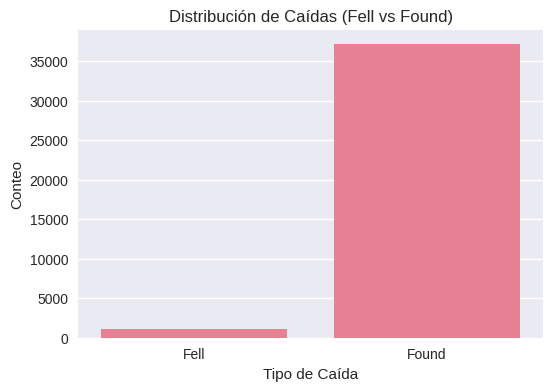

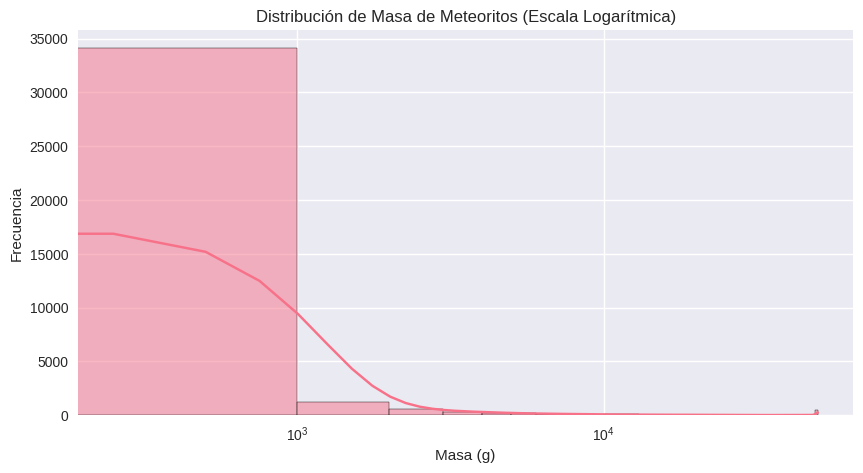

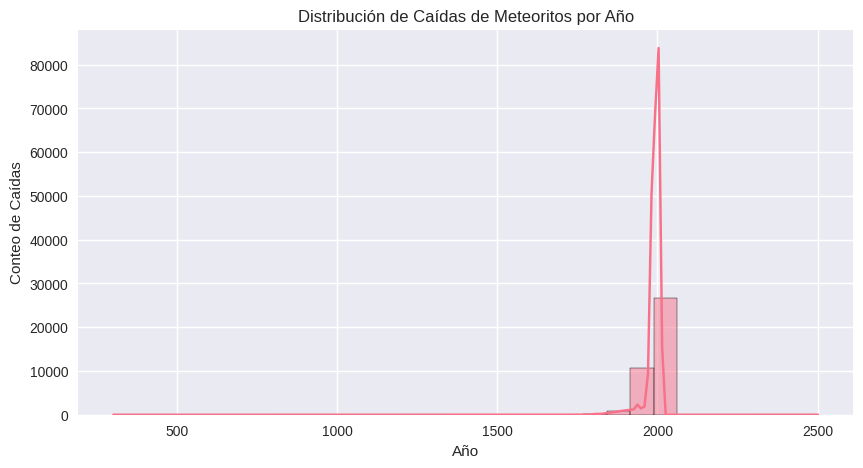

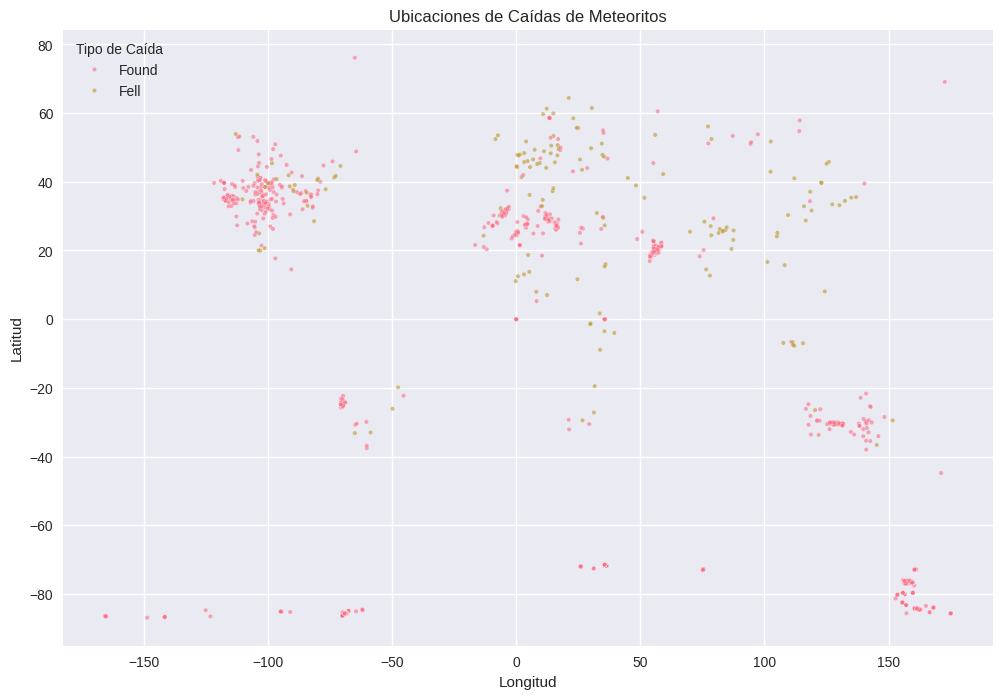

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x="fall", data=df)
plt.title("Distribución de Caídas (Fell vs Found)")
plt.xlabel("Tipo de Caída")
plt.ylabel("Conteo")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df["mass"].dropna(), bins=50, kde=True)
plt.title("Distribución de Masa de Meteoritos (Escala Logarítmica)")
plt.xlabel("Masa (g)")
plt.ylabel("Frecuencia")
plt.xscale("log")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df["year"].dropna(), bins=30, kde=True)
plt.title("Distribución de Caídas de Meteoritos por Año")
plt.xlabel("Año")
plt.ylabel("Conteo de Caídas")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x="reclong", y="reclat", data=df.sample(n=min(5000, len(df)), random_state=42), hue="fall", alpha=0.6, s=10)
plt.title("Ubicaciones de Caídas de Meteoritos")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Tipo de Caída")
plt.grid(True)
plt.show()

## **Limpieza de Datos e Ingeniería de Características**


Información de Datos de Región:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region_id         101 non-null    int64  
 1   fall_count        101 non-null    int64  
 2   avg_mass          101 non-null    float64
 3   reclat            101 non-null    float64
 4   reclong           101 non-null    float64
 5   log_fall_count    101 non-null    float64
 6   reclat^2          101 non-null    float64
 7   reclat reclong    101 non-null    float64
 8   reclat avg_mass   101 non-null    float64
 9   reclong^2         101 non-null    float64
 10  reclong avg_mass  101 non-null    float64
 11  avg_mass^2        101 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 9.6 KB

Encabezado de Datos de Región:
   region_id  fall_count     avg_mass     reclat     reclong  log_fall_count  \
0         -1           1    32.100000  -1

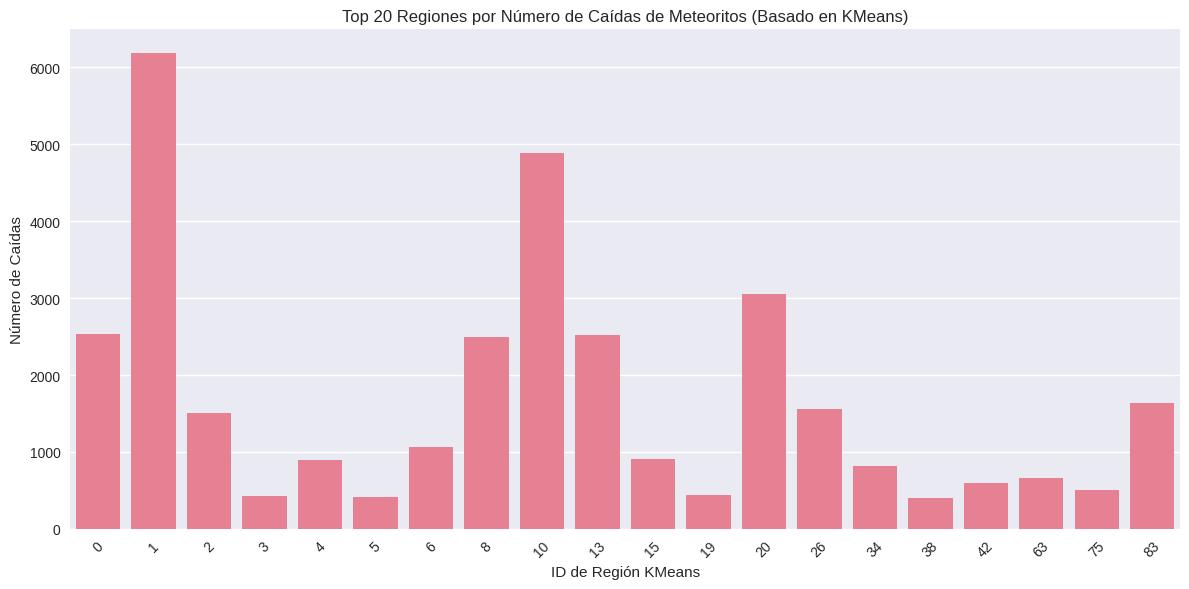

In [7]:
df.dropna(subset=["year"], inplace=True)
df["year"] = df["year"].astype(int)

median_mass = df["mass"].median()
df["mass"].fillna(median_mass, inplace=True)
mass_99th_percentile = df["mass"].quantile(0.99)
df["mass"] = df["mass"].clip(upper=mass_99th_percentile)

df.dropna(subset=["reclat", "reclong"], inplace=True)
df["reclat"] = pd.to_numeric(df["reclat"], errors="coerce")
df["reclong"] = pd.to_numeric(df["reclong"], errors="coerce")
df.dropna(subset=["reclat", "reclong"], inplace=True)

df["decade"] = (df["year"] // 10) * 10

# Separacion por regiones
df_coords = df[["reclat", "reclong"]].copy()
df_coords = df_coords[(df_coords["reclat"] >= -90) & (df_coords["reclat"] <= 90)]
df_coords = df_coords[(df_coords["reclong"] >= -180) & (df_coords["reclong"] <= 180)]

n_clusters_regions = 100
if len(df_coords) < n_clusters_regions:
    n_clusters_regions = len(df_coords)
if n_clusters_regions == 0:
    print("Advertencia: No hay coordenadas válidas para crear regiones con KMeans.")
    df["region_id"] = -1
else:
    kmeans_regions = KMeans(n_clusters=n_clusters_regions, random_state=42, n_init=10)
    df.loc[df_coords.index, "region_id"] = kmeans_regions.fit_predict(df_coords)

df["region_id"] = df["region_id"].fillna(-1).astype(int)

region_data = df.groupby("region_id").agg(
    fall_count=("name", "size"),
    avg_mass=("mass", "mean"),
    reclat=("reclat", "mean"),
    reclong=("reclong", "mean")
).reset_index()

region_data["log_fall_count"] = np.log1p(region_data["fall_count"])

features_for_poly = region_data[["reclat", "reclong", "avg_mass"]]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features_for_poly)
poly_feature_names = poly.get_feature_names_out(features_for_poly.columns)
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=region_data.index)
for col in poly_features_df.columns:
    if col not in region_data.columns:
        region_data[col] = poly_features_df[col]

print("\nInformación de Datos de Región:")
region_data.info()
print("\nEncabezado de Datos de Región:")
print(region_data.head())

print("\n--- Gráfico: Top 20 Regiones por Número de Caídas (Basado en KMeans) ---")
plt.figure(figsize=(12, 6))
top_regions_plot = region_data.sort_values(by="fall_count", ascending=False).head(20)
sns.barplot(x="region_id", y="fall_count", data=top_regions_plot)
plt.title("Top 20 Regiones por Número de Caídas de Meteoritos (Basado en KMeans)")
plt.xlabel("ID de Región KMeans")
plt.ylabel("Número de Caídas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Objetivo 1.1: Predicción Espacial - Clasificación (Alto/Bajo Riesgo)**

In [12]:
threshold_high_risk = region_data["fall_count"].quantile(0.75)
region_data["risk"] = region_data["fall_count"].apply(lambda x: "Alto" if x > threshold_high_risk else "Bajo")

exclude_cols_class = ["region_id", "fall_count", "log_fall_count", "risk"]
X_class_features = [col for col in region_data.columns if col not in exclude_cols_class]
X_class = region_data[X_class_features]
y_class = region_data["risk"]

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class_encoded, test_size=0.3, random_state=42, stratify=y_class_encoded
)

scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
classifier.fit(X_train_class_scaled, y_train_class)

y_pred_class = classifier.predict(X_test_class_scaled)
y_prob_class = classifier.predict_proba(X_test_class_scaled)[:, 1]

In [10]:
print(f"Precisión (Accuracy): {accuracy_score(y_test_class, y_pred_class):.4f}")
print(f"Precisión (Ponderada): {precision_score(y_test_class, y_pred_class, average='weighted'):.4f}")
print(f"Sensibilidad (Recall) (Ponderada): {recall_score(y_test_class, y_pred_class, average='weighted'):.4f}")
print(f"Puntuación F1 (Ponderada): {f1_score(y_test_class, y_pred_class, average='weighted'):.4f}")
print(f"Puntuación ROC AUC: {roc_auc_score(y_test_class, y_prob_class):.4f}")
print(f"Mapeo de riesgo: {le.classes_}")

Precisión (Accuracy): 0.8710
Precisión (Ponderada): 0.8710
Sensibilidad (Recall) (Ponderada): 0.8710
Puntuación F1 (Ponderada): 0.8710
Puntuación ROC AUC: 0.9674
Mapeo de riesgo: ['Alto' 'Bajo']



Matriz de Confusión (Objetivo 1.1)


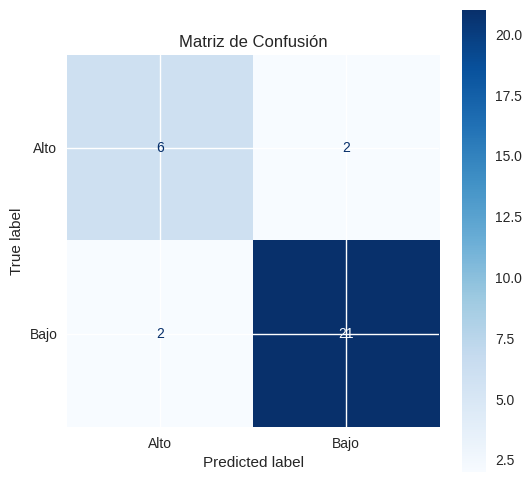

In [11]:
print("\nMatriz de Confusión (Objetivo 1.1)")
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Matriz de Confusión")
plt.show()

# **Objetivo 1.2: Predicción Espacial - Regresión (Número Esperado de Caídas)**

In [30]:
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

X_reg = region_data[X_class_features]
y_reg = region_data["log_fall_count"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg_scaled, y_train_reg)

y_pred_reg_log = regressor.predict(X_test_reg_scaled)
y_pred_reg = np.expm1(y_pred_reg_log)
y_test_reg_original = np.expm1(y_test_reg)

In [31]:
print(f"Error Cuadrático Medio (MSE): {mean_squared_error(y_test_reg_original, y_pred_reg):.4f}")
print(f"R-cuadrado (R2): {r2_score(y_test_reg_original, y_pred_reg):.4f}")
print(f"SMAPE (Error Porcentual Absoluto Medio Simétrico): {smape(y_test_reg_original, y_pred_reg):.4f}%")

Error Cuadrático Medio (MSE): 614424.9823
R-cuadrado (R2): 0.3412
SMAPE (Error Porcentual Absoluto Medio Simétrico): 61.1892%


# **Objetivo 2: Predicción de Tendencias Históricas (Frecuencia de Caídas)**

In [29]:
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

yearly_falls = df.groupby("year").size().reset_index(name="fall_count")
yearly_falls = yearly_falls.sort_values(by="year")

yearly_falls["fall_count_lag1"] = yearly_falls["fall_count"].shift(1)
yearly_falls["fall_count_lag2"] = yearly_falls["fall_count"].shift(2)
yearly_falls.dropna(inplace=True)

X_hist = yearly_falls[["year", "fall_count_lag1", "fall_count_lag2"]]
y_hist = yearly_falls["fall_count"]

split_year = 2000
X_train_hist = X_hist[X_hist["year"] < split_year]
y_train_hist = y_hist[yearly_falls["year"] < split_year]
X_test_hist = X_hist[X_hist["year"] >= split_year]
y_test_hist = y_hist[yearly_falls["year"] >= split_year]

regressor_hist = RandomForestRegressor(random_state=42)
regressor_hist.fit(X_train_hist, y_train_hist)

y_pred_hist = regressor_hist.predict(X_test_hist)

In [26]:
print(f"Error Cuadrático Medio (MSE) para la tendencia histórica: {mean_squared_error(y_test_hist, y_pred_hist):.4f}")
print(f"R-cuadrado (R2): {r2_score(y_test_hist, y_pred_hist):.4f}")
print(f"SMAPE (Error Porcentual Absoluto Medio Simétrico): {smape(y_test_hist, y_pred_hist):.4f}%")

Error Cuadrático Medio (MSE) para la tendencia histórica: 1047581.4115
R-cuadrado (R2): -0.2244
SMAPE (Error Porcentual Absoluto Medio Simétrico): 77.3068%


In [18]:
print(f"\nConteo de caídas futuras predichas para los próximos 10 años basadas en el modelo de tendencia:")

last_historical_year = X_hist["year"].max()
desired_prediction_start_year = 2025

current_last_fall_count = yearly_falls["fall_count"].iloc[-1]
current_second_last_fall_count = yearly_falls["fall_count"].iloc[-2] if len(yearly_falls) >= 2 else current_last_fall_count

gap_years = []
if last_historical_year + 1 < desired_prediction_start_year:
    gap_years = np.arange(last_historical_year + 1, desired_prediction_start_year)
    print(f"Rellenando predicciones para los años del hueco: {gap_years.min()} - {gap_years.max()}")

for year_g in gap_years:
    features_g = pd.DataFrame([[year_g, current_last_fall_count, current_second_last_fall_count]],
                              columns=["year", "fall_count_lag1", "fall_count_lag2"])
    predicted_count_g = regressor_hist.predict(features_g)[0]
    current_second_last_fall_count = current_last_fall_count
    current_last_fall_count = predicted_count_g

future_years = np.arange(desired_prediction_start_year, desired_prediction_start_year + 10)
future_predictions = []

for year in future_years:
    future_features = pd.DataFrame([[year, current_last_fall_count, current_second_last_fall_count]],
                                   columns=["year", "fall_count_lag1", "fall_count_lag2"])

    predicted_count = regressor_hist.predict(future_features)[0]
    future_predictions.append(predicted_count)

    current_second_last_fall_count = current_last_fall_count
    current_last_fall_count = predicted_count

for year, pred in zip(future_years, future_predictions):
    print(f"  Año {year}: ~{max(0, round(pred)):.0f} meteoritos")


Conteo de caídas futuras predichas para los próximos 10 años basadas en el modelo de tendencia:
  Año 2025: ~1287 meteoritos
  Año 2026: ~1360 meteoritos
  Año 2027: ~1731 meteoritos
  Año 2028: ~1763 meteoritos
  Año 2029: ~1703 meteoritos
  Año 2030: ~1692 meteoritos
  Año 2031: ~1692 meteoritos
  Año 2032: ~1692 meteoritos
  Año 2033: ~1692 meteoritos
  Año 2034: ~1692 meteoritos


In [108]:
import folium

print("\n--- Opcional: Generando un mapa interactivo de Folium para Predicciones Espaciales ---")

if "region_data" not in locals() or \
   "classifier" not in locals() or \
   "regressor" not in locals() or \
   "scaler_class" not in locals() or \
   "scaler_reg" not in locals() or \
   "le" not in locals() or \
   "X_class_features" not in locals():
    print("Error: Variables requeridas de fragmentos anteriores (region_data, modelos, escaladores) no encontradas.")
    print("Por favor, asegúrese de haber ejecutado todos los fragmentos anteriores.")
else:
    map_center = [region_data["reclat"].mean(), region_data["reclong"].mean()]
    m = folium.Map(location=map_center, zoom_start=2)

    region_data_vis = region_data.copy()

    region_data_vis["predicted_risk_encoded"] = classifier.predict(scaler_class.transform(region_data_vis[X_class_features]))
    region_data_vis["predicted_risk"] = le.inverse_transform(region_data_vis["predicted_risk_encoded"])

    predicted_log_falls = regressor.predict(scaler_reg.transform(region_data_vis[X_class_features]))
    region_data_vis["predicted_fall_count"] = np.expm1(predicted_log_falls)

    print("\nAñadiendo marcadores al mapa. Esto puede tardar un momento...")
    for index, row in region_data_vis.iterrows():
        color = "red" if row["risk"] == "Alto" else "green"

        radius_val = np.log(max(1, row["predicted_fall_count"]) + 1) * 3

        folium.CircleMarker(
            location=[row["reclat"], row["reclong"]],
            radius=radius_val,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"Región: {row['region_id']}<br>"
                  f"Caídas Reales: {int(row['fall_count'])}<br>"
                  f"Caídas Predichas: {int(round(row['predicted_fall_count']))}<br>"
                  f"Riesgo Real: {row['risk']}<br>"
                  f"Riesgo Predicho: {row['predicted_risk']}"
        ).add_to(m)

    print("\nObjeto de mapa de Folium 'm' creado. Escriba 'm' en una nueva celda para mostrarlo.")
    print("También puede guardarlo como un archivo HTML: m.save('meteorite_risk_map.html')")


--- Opcional: Generando un mapa interactivo de Folium para Predicciones Espaciales ---

Añadiendo marcadores al mapa. Esto puede tardar un momento...

Objeto de mapa de Folium 'm' creado. Escriba 'm' en una nueva celda para mostrarlo.
También puede guardarlo como un archivo HTML: m.save('meteorite_risk_map.html')


In [109]:
m

# **Conclusion**

Este proyecto ha logrado implementar exitosamente modelos de Machine Learning para abordar la compleja tarea de predecir la actividad de meteoritos, un campo donde la precisión es inherentemente desafiante. Se han desarrollado y aplicado herramientas analíticas con el fin de comprender mejor los patrones de impacto y establecer una base sólida para futuras investigaciones. Nuestro trabajo se centró en tres objetivos principales:


* **Objetivo 1.1:** Predicción de probabilidad de caída por región (Clasificación)
* **Objetivo 1.2:** Predicción del número esperado de caídas por región (Regresión espacial)
* **Objetivo 2:** Predicción de tendencias históricas de caídas (Serie temporal)

A través de este enfoque multifacético, hemos generado información valiosa que contribuye al análisis y la anticipación de eventos meteóricos.

## **Abordando el SMAPE**

Los valores de SMAPE obtenidos, alrededor del 61% para la predicción espacial (Objetivo 1.2) y un 77% para la predicción de tendencias históricas anuales (Objetivo 2), son indicativos de la complejidad inherente del fenómeno estudiado.

Las caídas de meteoritos, por su naturaleza impredecible, presentan un desafío significativo para la modelización. Adicionalmente, la base de datos utilizada, que combina registros de meteoritos "caídos" (observados directamente) y "encontrados" (descubiertos), hace que se dificulte la identificacion de patrones constantes.

Un SMAPE elevado en este contexto sugiere que, si bien los modelos pueden capturar ciertas tendencias o indicar zonas de mayor actividad, la precisión en la predicción numérica exacta de eventos raros es inherentemente limitada. Esto implica que las predicciones deben interpretarse más como estimaciones de magnitud o indicadores de probabilidad que como valores exactos.

Mejoras futuras podrían explorarse mediante la aplicación de modelos de series de tiempo más especializados o la consideración de enfoques probabilísticos, siempre reconociendo las restricciones impuestas por la aleatoriedad este evento.